In [ ]:
import pandas as pd

# Load the datasets
buyrentkenya_df = pd.read_csv('buyrentkenya_property_listings.csv')
propco_rent_df = pd.read_csv('propco_listings-rent.csv')
propco_sale_df = pd.read_csv('propco_listings-sale.csv')

# Inspect buyrentkenya_property_listings.csv
buyrentkenya_info = buyrentkenya_df.info()
buyrentkenya_head = buyrentkenya_df.head()
buyrentkenya_describe = buyrentkenya_df.describe()

# Inspect propco_listings-rent.csv
propco_rent_info = propco_rent_df.info()
propco_rent_head = propco_rent_df.head()
propco_rent_describe = propco_rent_df.describe()

# Inspect propco_listings-sale.csv
propco_sale_info = propco_sale_df.info()
propco_sale_head = propco_sale_df.head()
propco_sale_describe = propco_sale_df.describe()

buyrentkenya_info, buyrentkenya_head, buyrentkenya_describe, propco_rent_info, propco_rent_head, propco_rent_describe, propco_sale_info, propco_sale_head, propco_sale_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12531 entries, 0 to 12530
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                12523 non-null  object 
 1   Other Location Details  12531 non-null  object 
 2   Size                    2752 non-null   object 
 3   Bedrooms                12494 non-null  float64
 4   Bathrooms               11564 non-null  float64
 5   Price                   12515 non-null  object 
 6   Property Type           12531 non-null  object 
 7   Purchase Type           12531 non-null  object 
dtypes: float64(2), object(6)
memory usage: 783.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       9980 non-null   object
 1   Beds           9980 non-null   object
 2   Baths          9980 non-n

(None,
         Location Other Location Details       Size  ...           Price  Property Type Purchase Type
 0  Ongata Rongai          Ongata Rongai        NaN  ...  KSh 16,400,000          House          Sale
 1    Windy Ridge                  Karen        NaN  ...  KSh 59,000,000          House          Sale
 2        Phase 2               Buruburu        NaN  ...  KSh 13,000,000          House          Sale
 3      Lavington              Lavington        NaN  ...  KSh 55,000,000          House          Sale
 4     Athi river              Kitengela  10000 ft²  ...  KSh 17,000,000          House          Sale
 
 [5 rows x 8 columns],
            Bedrooms     Bathrooms
 count  12494.000000  11564.000000
 mean       3.232512      3.370806
 std        1.469876      1.556233
 min        0.000000      1.000000
 25%        2.000000      2.000000
 50%        3.000000      3.000000
 75%        4.000000      4.000000
 max       10.000000     10.000000,
 None,
           Location Beds Baths To

# New Section

In [ ]:
import pandas as pd
import numpy as np


buyrentkenya_df = pd.read_csv('buyrentkenya_property_listings.csv')
propco_rent_df = pd.read_csv('propco_listings-rent.csv')
propco_sale_df = pd.read_csv('propco_listings-sale.csv')


buyrentkenya_df.columns = buyrentkenya_df.columns.str.strip().str.lower().str.replace(' ', '_')
propco_rent_df.columns = propco_rent_df.columns.str.strip().str.lower().str.replace(' ', '_')
propco_sale_df.columns = propco_sale_df.columns.str.strip().str.lower().str.replace(' ', '_')


buyrentkenya_df.dropna(subset=['location'], inplace=True)
buyrentkenya_df['bathrooms'].fillna(buyrentkenya_df['bathrooms'].mode()[0], inplace=True)
buyrentkenya_df.drop_duplicates(inplace=True)

propco_rent_df.drop_duplicates(inplace=True)

# For propco_sale_df
propco_sale_df.drop_duplicates(inplace=True)

# Add a 'source' column to identify the dataset origin
buyrentkenya_df['source'] = 'buyrentkenya'
propco_rent_df['source'] = 'propco_rent'
propco_sale_df['source'] = 'propco_sale'

# Merge the datasets
merged_df = pd.concat([buyrentkenya_df, propco_rent_df, propco_sale_df], ignore_index=True)

# Clean 'price' and 'size' columns
merged_df['price'] = merged_df['price'].str.replace('KSh', '').str.replace(',', '')
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce')

merged_df['size'] = merged_df['size'].str.replace('ft²', '').str.replace(',', '')
merged_df['size'] = pd.to_numeric(merged_df['size'], errors='coerce')

# Convert remaining numeric columns to numeric types
for col in ['beds', 'baths', 'toilets', 'bedrooms', 'bathrooms']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Fill missing values with median
for col in ['size', 'price', 'beds', 'baths', 'toilets', 'bedrooms', 'bathrooms']:
    median_value = merged_df[col].median()
    merged_df[col].fillna(median_value, inplace=True)

# Save the cleaned and merged dataframe to a CSV file
merged_df.to_csv('cleaned_merged_property_listings.csv', index=False)




In [ ]:
merged_df.head()

,location,other_location_details,size,bedrooms,bathrooms,price,property_type,purchase_type,source,beds,baths,toilets
0,Ongata Rongai,Ongata Rongai,2400.0,4.0,2.0,16400000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
1,Windy Ridge,Karen,2400.0,4.0,4.0,59000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
2,Phase 2,Buruburu,2400.0,4.0,2.0,13000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
3,Lavington,Lavington,2400.0,5.0,5.0,55000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
4,Athi river,Kitengela,10000.0,4.0,4.0,17000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0


In [ ]:
merged_df.describe()

,size,bedrooms,bathrooms,price,beds,baths,toilets
count,1.953400e+04,19534.000000,19534.000000,1.953400e+04,19534.000000,19534.000000,19534.000000
mean,2.518347e+03,3.131207,3.142828,2.301434e+07,2.123221,2.102846,2.086516
std,1.430220e+04,1.063266,1.114577,8.907297e+07,0.937520,0.999984,1.025548
min,8.500000e+01,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.400000e+03,3.000000,3.000000,3.500000e+04,2.000000,2.000000,2.000000
50%,2.400000e+03,3.000000,3.000000,6.713000e+06,2.000000,2.000000,2.000000
75%,2.400000e+03,3.000000,3.000000,1.600000e+07,2.000000,2.000000,2.000000
max,2.000000e+06,10.000000,10.000000,4.500000e+09,10.000000,10.000000,10.000000


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                19534 non-null  object 
 1   other_location_details  9876 non-null   object 
 2   size                    19534 non-null  float64
 3   bedrooms                19534 non-null  float64
 4   bathrooms               19534 non-null  float64
 5   price                   19534 non-null  float64
 6   property_type           19534 non-null  object 
 7   purchase_type           19534 non-null  object 
 8   source                  19534 non-null  object 
 9   beds                    19534 non-null  float64
 10  baths                   19534 non-null  float64
 11  toilets                 19534 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.8+ MB


In [ ]:
from google.colab import files
files.download('cleaned_merged_property_listings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [ ]:
with open('cleaned_merged_property_listings.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
data = pd.read_csv('cleaned_merged_property_listings.csv', encoding='Windows-1252')

In [ ]:
data.head()

,location,other_location_details,size,bedrooms,bathrooms,price,property_type,purchase_type,source,beds,baths,toilets
0,Ongata Rongai,Ongata Rongai,2400.0,4.0,2.0,16400000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
1,Windy Ridge,Karen,2400.0,4.0,4.0,59000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
2,Phase 2,Buruburu,2400.0,4.0,2.0,13000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
3,Lavington,Lavington,2400.0,5.0,5.0,55000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
4,Athi river,Kitengela,10000.0,4.0,4.0,17000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0


In [ ]:
data.shape

(19534, 12)

<Axes: >

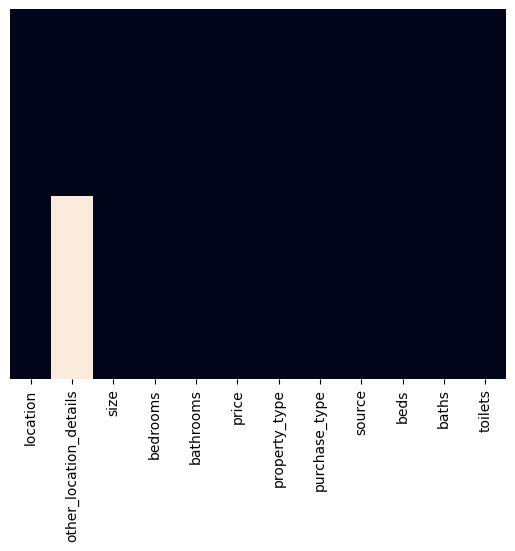

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [ ]:
data.bathrooms.unique()

array([ 2.,  4.,  5.,  3.,  6.,  7., 10.,  8.,  9.,  1.])

In [ ]:
data.isnull().sum()

,0
location,0
other_location_details,9658
size,0
bedrooms,0
bathrooms,0
price,0
property_type,0
purchase_type,0
source,0
beds,0


In [ ]:
data['other_location_details'].fillna(data.other_location_details.mode(), inplace=True)

In [ ]:
data['other_location_details'].describe()


,other_location_details
count,9876
unique,740
top,Westlands
freq,2165


In [ ]:
data.columns

Index(['location', 'other_location_details', 'size', 'bedrooms', 'bathrooms',
       'price', 'property_type', 'purchase_type', 'source', 'beds', 'baths',
       'toilets'],
      dtype='object')

In [ ]:
df1 = data[[ 'size', 'bedrooms', 'bathrooms',
       'price', 'beds', 'baths',
       'toilets']]

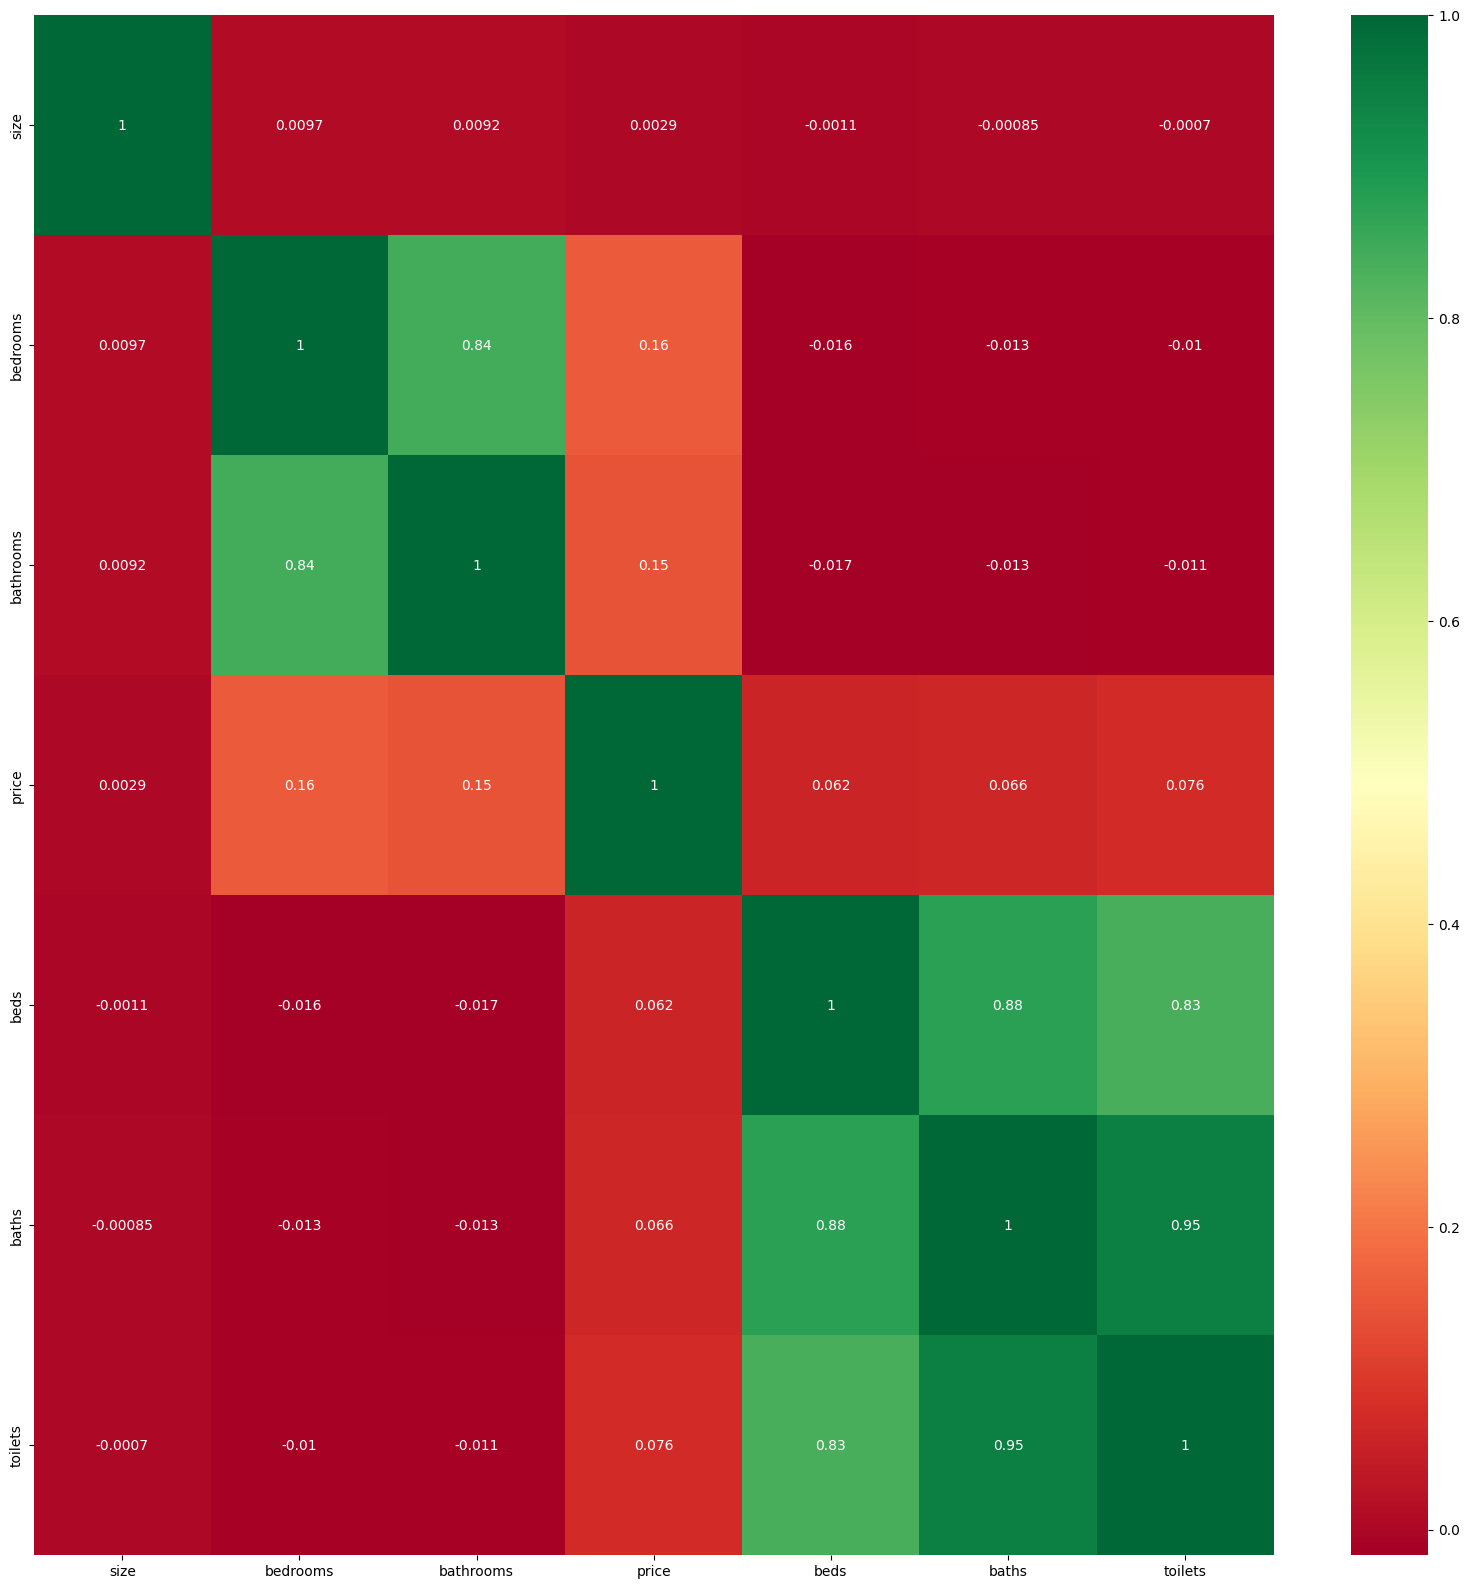

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True, cmap = "RdYlGn")
plt.show()
#

<Axes: xlabel='price', ylabel='Density'>

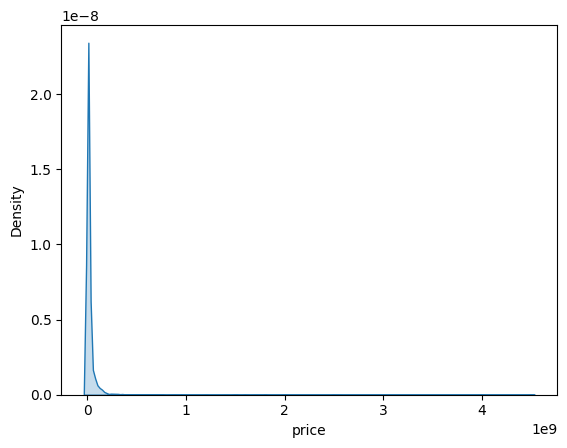

In [ ]:
sns.kdeplot(data['price'], shade =True)

<Axes: ylabel='price'>

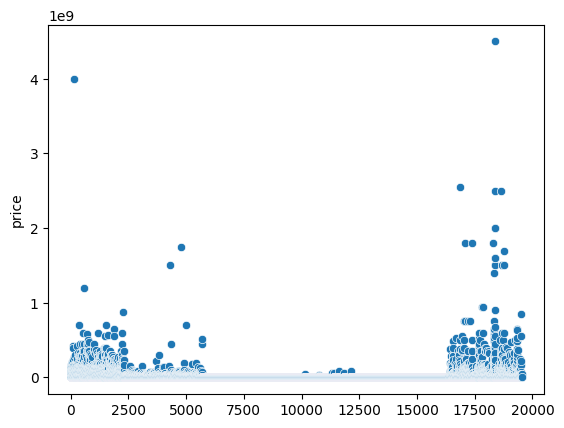

In [ ]:
sns.scatterplot(data=data['price'])

In [ ]:
Q1=3.500000e+04
Q3=1.600000e+07
IQR=Q3-Q1
print("So,IQR of our totalPrice Features is",IQR)

So,IQR of our totalPrice Features is 15965000.0


In [ ]:
data.price.describe()

,price
count,1.953400e+04
mean,2.301434e+07
std,8.907297e+07
min,0.000000e+00
25%,3.500000e+04
50%,6.713000e+06
75%,1.600000e+07
max,4.500000e+09


<Axes: xlabel='size', ylabel='price'>

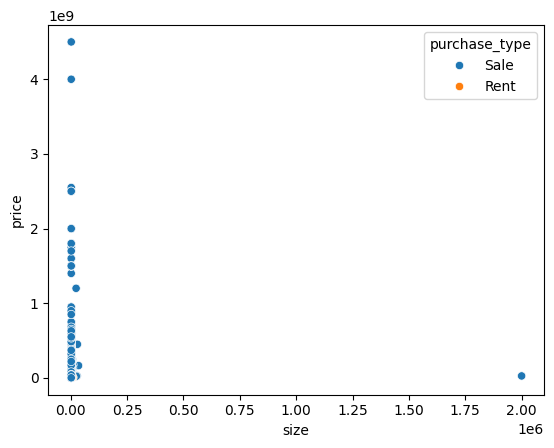

In [ ]:
sns.scatterplot(x=data['size'], y=data['price'], hue=data['purchase_type'])

In [ ]:
High=Q3+1.5*IQR
Low=Q1-1.5*IQR
print("High value of our totalPrice Features is",High)
print("Low value of our totalPrice Features is",Low)

High value of our totalPrice Features is 39947500.0
Low value of our totalPrice Features is -23912500.0


In [ ]:
df = data.copy()

In [ ]:
df=df[df['price']<=High]
df=df[df['price']>=Low]

<Axes: ylabel='price'>

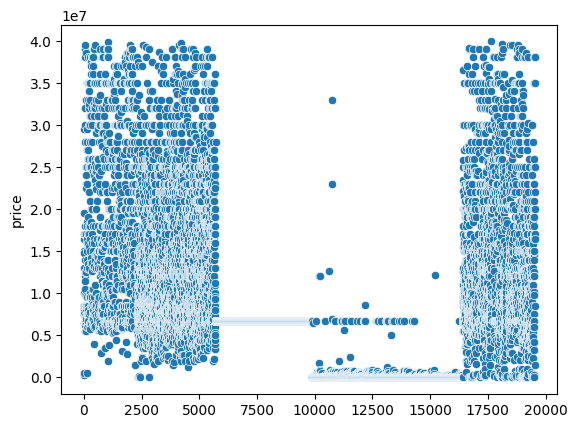

In [ ]:
sns.scatterplot(data=df['price'])

In [ ]:
print(data.shape)
print(df.shape)

(19534, 12)
(17141, 12)


In [ ]:
print("Total outlier Removed =",data.shape[0]-df.shape[0])

Total outlier Removed = 2393


In [ ]:
df.columns

Index(['location', 'other_location_details', 'size', 'bedrooms', 'bathrooms',
       'price', 'property_type', 'purchase_type', 'source', 'beds', 'baths',
       'toilets'],
      dtype='object')

In [ ]:
df.drop(['other_location_details'], axis=1, inplace=True)

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

In [ ]:
df.isnull().sum()

,0
location,0
size,0
bedrooms,0
bathrooms,0
price,0
property_type,0
purchase_type,0
source,0
beds,0
baths,0


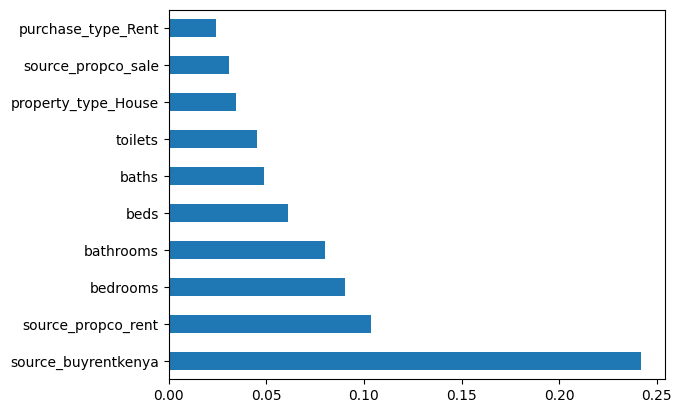

In [ ]:

import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_features = ohe.fit_transform(df[categorical_cols]).toarray()

encoded_df = pd.DataFrame(encoded_features,
                          columns=ohe.get_feature_names_out(categorical_cols))

df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)


imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns

X = df_imputed.drop('price', axis=1)
y = df_imputed['price']

model = ExtraTreesRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
df.select_dtypes(include=['object']).columns.tolist()

['property_type', 'purchase_type', 'source']

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_features = ohe.fit_transform(df[categorical_cols]).toarray()

encoded_df = pd.DataFrame(encoded_features,
                          columns=ohe.get_feature_names_out(categorical_cols))

df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns
X = df_imputed.drop('price', axis=1)
y = df_imputed['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("By using Linear Regression I got")
print("Training Score:", lr_model.score(X_train, y_train))
print("Testing Score:", lr_model.score(X_test, y_test))

By using Linear Regression I got
Training Score: 0.516562519120578
Testing Score: -11208537818056.738


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
rfm = RandomForestRegressor()
rfm.fit(X_train_scaled, y_train)

# Evaluate the model
print("Training Score:", rfm.score(X_train_scaled, y_train))
print("Testing Score:", rfm.score(X_test_scaled, y_test))


Training Score: 0.8064672462238593
Testing Score: 0.595196492747424


In [ ]:
predictions = rfm.predict(X_test_scaled)

In [ ]:
predictions

array([10918110.89400988,  7233996.8968254 , 10918110.89400988, ...,
        6713000.        , 15031815.64713554,  6713000.        ])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
print(mean_absolute_error(y_test,predictions))
print(metrics.mean_absolute_error(y_test,predictions))

2341070.894905854
2341070.894905854


In [ ]:
rfm=RandomForestRegressor(max_depth=None,min_samples_leaf=5,min_samples_split=6,
                          n_estimators=120,verbose=2,n_jobs=-1)

In [ ]:
rfm.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   50.2s


building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120
building tree 45 of 120
building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120building tree 77 of 120

building tree 78 of 120
building tree 79 of 120
building tree 80

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.3min finished


RandomForestRegressor(min_samples_leaf=5, min_samples_split=6, n_estimators=120,
                      n_jobs=-1, verbose=2)

In [ ]:
print(rfm.score(X_train,y_train))
print(rfm.score(X_test,y_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s


0.6859116637271694
0.6359041981550106


[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.1s finished


In [ ]:
X.columns

Index(['size', 'bedrooms', 'bathrooms', 'beds', 'baths', 'toilets',
       'location_0614N', 'location_0614n', 'location_0619n', 'location_0621J',
       ...
       'location_yukos', 'property_type_Apartment', 'property_type_Bedsitter',
       'property_type_House', 'property_type_Other', 'purchase_type_Rent',
       'purchase_type_Sale', 'source_buyrentkenya', 'source_propco_rent',
       'source_propco_sale'],
      dtype='object', length=3455)

In [ ]:
test_data=[[2010,120,130,3,1,2,2,2005,45000,0,0,1,0,0,0,0,0,1]]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Assuming X and y are already defined
# Select the first 6 columns
X_reduced = X.iloc[:, :6]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
rfm = RandomForestRegressor()
rfm.fit(X_train_scaled, y_train)

# Evaluate the model
print("Training Score:", rfm.score(X_train_scaled, y_train))
print("Testing Score:", rfm.score(X_test_scaled, y_test))

# Create predictions
predictions = rfm.predict(X_test_scaled)

# Print the predictions
print("Predictions:", predictions)


Training Score: 0.30494131905807154
Testing Score: 0.24851773727017445
Predictions: [ 6686386.74785782  4834632.62687399  6686386.74785782 ...
 10581080.21133338  6686386.74785782 12668929.86693792]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fit the model on the full feature set to get feature importances
rfm_full = RandomForestRegressor()
rfm_full.fit(X, y)

# Get feature importances and select the top 6 features
importances = rfm_full.feature_importances_
indices = np.argsort(importances)[-6:]  # Indices of top 6 features

# Select the top 6 features from X
X_reduced = X.iloc[:, indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
rfm = RandomForestRegressor()
rfm.fit(X_train_scaled, y_train)

# Evaluate the model
print("Training Score:", rfm.score(X_train_scaled, y_train))
print("Testing Score:", rfm.score(X_test_scaled, y_test))

# Create predictions
predictions = rfm.predict(X_test_scaled)

# Print the predictions
print("Predictions:", predictions)


Training Score: 0.531953716620005
Testing Score: 0.5352174266830917
Predictions: [10876362.82124586  3768865.41498751 10876362.82124586 ...
 10396573.72014214 16764829.88244087 12129269.19632064]


In [ ]:
pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
